In [1]:
"""
Initial setup:
1) create virtualenv project using pycharm

2) install the following libraries to virtualenv:
pip install numpy
pip install pandas
pip install requests
pip install beautifulsoup4
pip install lxml
"""

'\nInitial setup:\n1) create virtualenv project using pycharm\n\n2) install the following libraries to virtualenv:\npip install numpy\npip install pandas\npip install requests\npip install beautifulsoup4\npip install lxml\n'

In [2]:
import requests  # library to send requests to web site(krisha.kz)
from bs4 import BeautifulSoup as bs  # library to copy all html-code
import csv  # library to write info to csv
import pandas as pd  # to convert csv to pandas DataFrame
import numpy as np  # to work np. arrays
import time

In [3]:
headers = {
    'accept': '*/*',
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36'
}

base_url = 'https://krisha.kz/arenda/kvartiry/almaty/?das[rent.period]=2'

def krisha_parse(base_url, headers):
    flats = []
    urls = []
    urls.append(base_url)
    session = requests.Session()
    request = session.get(base_url, headers=headers)
    if request.status_code == 200:
        soup = bs(request.content, 'lxml')
        try:
            pagination = soup.find_all('a', attrs={'class': 'paginator__btn'})
            count = int(pagination[-2].text)
            for i in range(2, count - 1):
                url = 'https://krisha.kz/arenda/kvartiry/almaty/?das[rent.period]=2&page={i}'.format(i=i)
                if url not in urls:
                    urls.append(url)
        except:
            pass

        for url in urls:
            time.sleep(1)
            print("parsing: " + url)

            request = session.get(url, headers=headers)
            soup = bs(request.content, 'lxml')
            divs = soup.find_all('div', attrs={'class': 'a-card a-storage-live ddl_product ddl_product_link not-colored is-visible'})
            for div in divs:
                title = div.find('a', attrs={'class': 'a-card__title'}).string
                price = div.find('div', attrs={'class': 'a-card__price'}).text
                href = div.find('a', attrs={'class': 'a-card__title'})['href']
                address = div.find('div', attrs={'class': 'a-card__subtitle'}).text
                content = div.find('div', attrs={'class': 'a-card__text-preview'}).text
                owner = div.find('div', attrs={'class': 'a-card__owner user-title-not-pro'})
                if owner is None:
                    specialist = 1
                    owner = 0
                else:
                    specialist = 0
                    owner = 1
                flats.append({
                    'title': title,
                    'price': price,
                    'href': href,
                    'address': address,
                    'content': content,
                    'specialist': specialist,
                    'owner': owner
                })
        print(len(flats))
    else:
        print('ERROR')
    return flats


def files_writer(flats):
    # with open('HeadHunter.csv', 'a', encoding='utf-8') as file:
    with open(r"Krisha.csv", "w", encoding='utf-8') as file:
        a_pen = csv.writer(file)
        a_pen.writerow(('title', 'price', 'href', 'address', 'content', 'owner', 'specialist'))
        for flat in flats:
            a_pen.writerow((flat['title'], flat['price'], flat['href'], flat['address'], flat['content'], flat['owner'],
                            flat['specialist']))


flats = krisha_parse(base_url, headers)
files_writer(flats)

parsing: https://krisha.kz/arenda/kvartiry/almaty/?das[rent.period]=2
parsing: https://krisha.kz/arenda/kvartiry/almaty/?das[rent.period]=2&page=2
parsing: https://krisha.kz/arenda/kvartiry/almaty/?das[rent.period]=2&page=3
parsing: https://krisha.kz/arenda/kvartiry/almaty/?das[rent.period]=2&page=4
parsing: https://krisha.kz/arenda/kvartiry/almaty/?das[rent.period]=2&page=5
parsing: https://krisha.kz/arenda/kvartiry/almaty/?das[rent.period]=2&page=6
parsing: https://krisha.kz/arenda/kvartiry/almaty/?das[rent.period]=2&page=7
parsing: https://krisha.kz/arenda/kvartiry/almaty/?das[rent.period]=2&page=8
parsing: https://krisha.kz/arenda/kvartiry/almaty/?das[rent.period]=2&page=9
parsing: https://krisha.kz/arenda/kvartiry/almaty/?das[rent.period]=2&page=10
parsing: https://krisha.kz/arenda/kvartiry/almaty/?das[rent.period]=2&page=11
parsing: https://krisha.kz/arenda/kvartiry/almaty/?das[rent.period]=2&page=12
parsing: https://krisha.kz/arenda/kvartiry/almaty/?das[rent.period]=2&page=13
pa

In [4]:
df = pd.read_csv('Krisha.csv')

In [5]:
df.head()

,title,price,href,address,content,owner,specialist
0,"2-комнатная квартира, 87 м², 16/17 этаж на дли...",\n ...,/a/show/677175302,\n Бостандыкский р-...,"\n 2016 г.п., состояние: хо...",0,1
1,"2-комнатная квартира, 68.6 м², 12/16 этаж на д...",\n ...,/a/show/677065464,\n Бостандыкский р-...,"\n 2021 г.п., состояние: хо...",0,1
2,"2-комнатная квартира, 54 м², 1/5 этаж на длите...",\n ...,/a/show/679566820,"\n Алатауский р-н, ...","\n полностью, СРОЧНО!\n ...",0,1
3,"1-комнатная квартира, 50 м², 1/2 этаж на длите...",\n ...,/a/show/679546177,"\n Жетысуский р-н, ...","\n жил. площадь 30 м², кухн...",0,1
4,"3-комнатная квартира, 75 м², 1/12 этаж на длит...",\n ...,/a/show/679566847,"\n Алатауский р-н, ...","\n жил. комплекс Алмалы, по...",0,1


In [6]:
df.shape

(2721, 7)

In [7]:
new = df["title"].str.split(",", expand = True)
df["rooms"]= new[0]
df["square"]= new[1] 
#df["floor"]=new[2]
df.drop(columns =["title"], inplace = True)

new = df["address"].str.split(",", expand = True)
df["district"]= new[0]
df["street"]= new[1]
df.drop(columns =["address"], inplace = True)

new = df["district"].str.split(expand = True)
df["district"] = new[0]

new = df["square"].str.split(expand = True)
df["square"] = new[0]
df['square']=pd.to_numeric(df['square'])

df.drop(columns =["href"], inplace = True)

new = df["price"].str.split(expand = True)
new = new[0]+new[1]
df["price"] = new
df['price']=pd.to_numeric(df['price'])
df.loc[df.price <= 10000,'price'] = df.price * 1000

new = df['rooms'].str.split('-', expand = True)
df['rooms'] = new[0]

df.drop(columns =["street"], inplace = True)

#new = df['floor'].str.split('/', expand = True)
#df['floor'] = new[0]
#new = new.dropna()
#new = new[1].str.split(' ',expand = True)
#df['total floors'] = new[0]

df = df.dropna()

districts = ['Алмалинский','Бостандыкский','Ауэзовский','Медеуский','Жетысуский','Наурызбайский','Алатауский','Турксибский']
df = df[df['district'].isin(districts)]

year = list(df['content'])
yeardf=[]
for years in year:
    years = years[years.find("г.п.")-5:years.find("г.п.")-1]
    yeardf.append(years)
df['year'] = yeardf

df.drop(columns = ["content"], inplace = True)

df['yearisnull'] = df['year'].str.find('    ')
df = df.loc[df.yearisnull != 0]

df.drop(columns =["yearisnull"], inplace = True)

df['rooms']=pd.to_numeric(df['rooms'])
#df = df.loc[df.rooms!=11]

In [8]:
df.head()

,price,owner,specialist,rooms,square,district,year
0,390000,0,1,2,87.0,Бостандыкский,2016
1,500000,0,1,2,68.6,Бостандыкский,2021
5,300000,0,1,2,62.0,Наурызбайский,2021
17,750000,0,1,3,110.0,Бостандыкский,2001
19,850000,0,1,3,140.0,Бостандыкский,2020


In [9]:
df.shape

(370, 7)

In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [11]:
df1 = df.groupby(['district']).size().reset_index(name='count')
df1.sort_values(by=['count'], inplace=True)
df1

,district,count
0,Алатауский,13
4,Жетысуский,14
7,Турксибский,15
6,Наурызбайский,17
2,Ауэзовский,42
1,Алмалинский,55
5,Медеуский,65
3,Бостандыкский,149


In [12]:
df1.set_index('district', inplace=True)

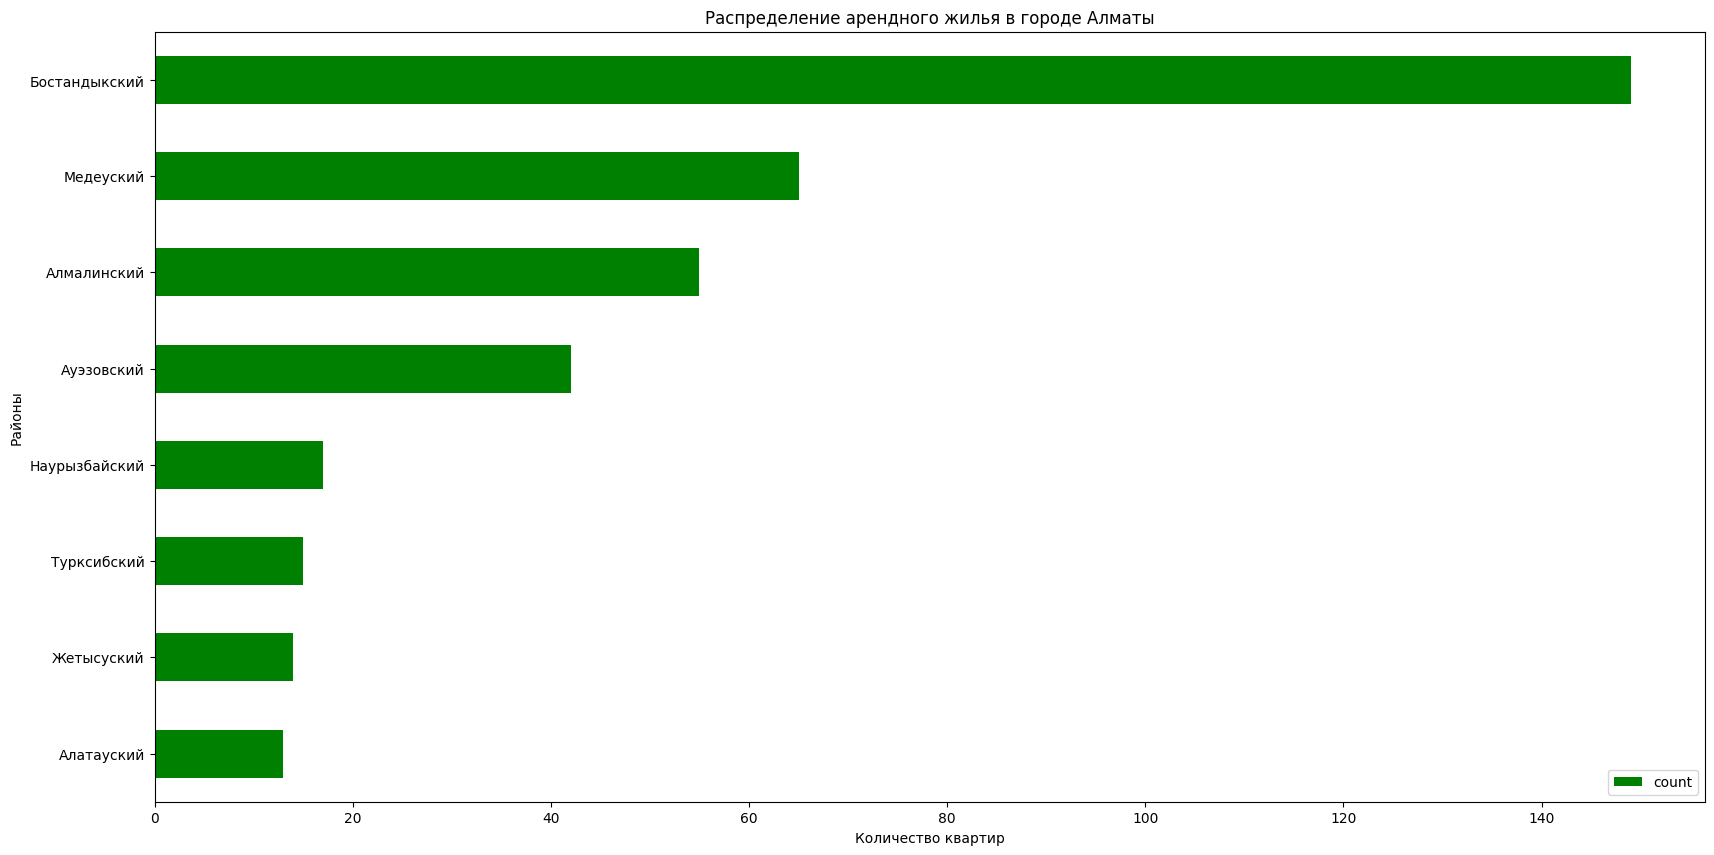

In [13]:
df1.plot(kind='barh', 
             stacked=False,
             figsize=(20, 10),
             color='g',
             label=df1['count']
             )

plt.title('Распределение арендного жилья в городе Алматы')
plt.xlabel('Количество квартир')
plt.ylabel('Районы')
plt.show()

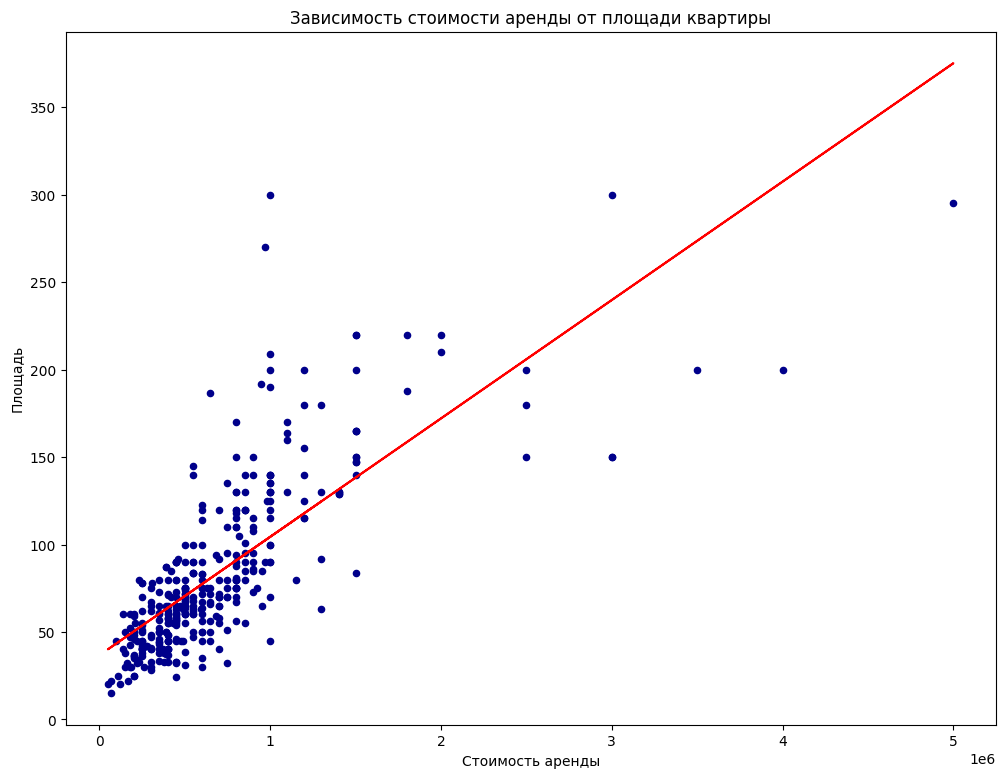

In [14]:
df.plot(kind='scatter', x='price', y='square', figsize=(12, 9), color='darkblue')

plt.title('Зависимость стоимости аренды от площади квартиры')
plt.xlabel('Стоимость аренды')
plt.ylabel('Площадь')

x = df['price']
y = df['square']
fit = np.polyfit(x, y, deg=1)
plt.plot(x, fit[0] * x + fit[1], color='red')

plt.show()

In [15]:
df2 = df.loc[df.price <= 200000]

In [16]:
df2.head()

,price,owner,specialist,rooms,square,district,year
42,170000,0,1,1,22.0,Ауэзовский,1980
236,150000,0,1,1,30.0,Жетысуский,
270,200000,0,1,1,59.0,Наурызбайский,1986
292,70000,0,1,1,15.0,Жетысуский,2000
335,200000,0,1,2,60.0,Турксибский,


In [17]:
df2.shape

(31, 7)

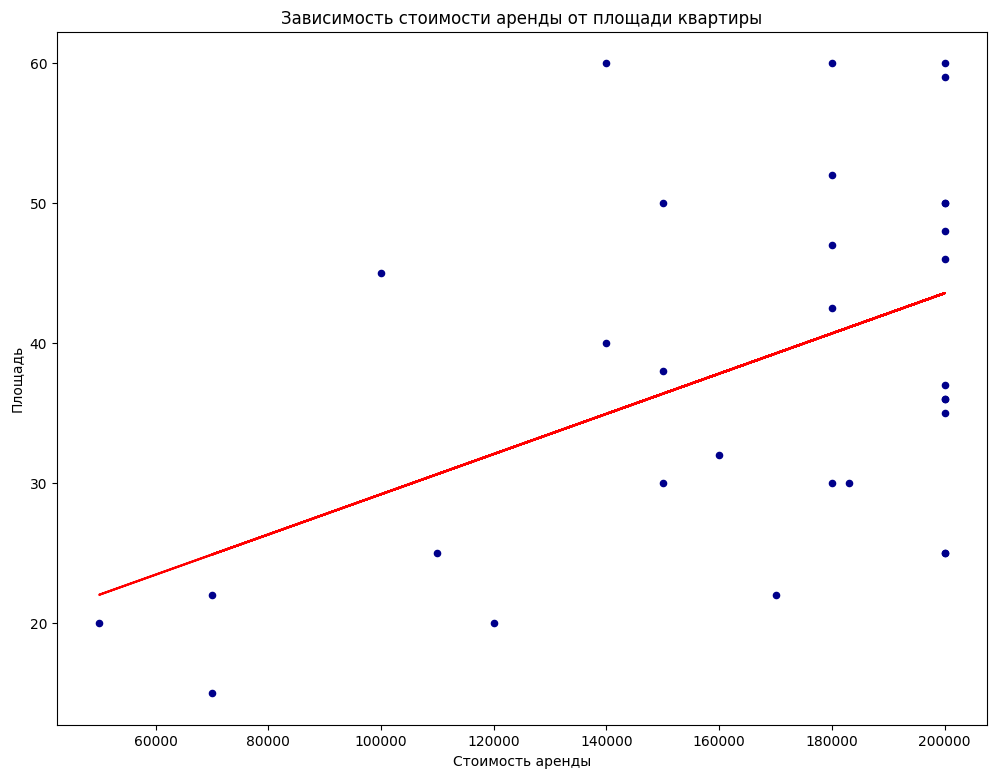

In [18]:
df2.plot(kind='scatter', x='price', y='square', figsize=(12, 9), color='darkblue')

plt.title('Зависимость стоимости аренды от площади квартиры')
plt.xlabel('Стоимость аренды')
plt.ylabel('Площадь')

x = df2['price']
y = df2['square']
fit = np.polyfit(x, y, deg=1)
plt.plot(x, fit[0] * x + fit[1], color='red')

plt.show()

In [19]:
df4 = df.groupby(['district']).sum()
#df4.sort_values(by=['count'], inplace=True)
df4

/var/folders/kj/9zj044hj36s9ykh3h8vv_1180000gn/T/ipykernel_16836/801857599.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df4 = df.groupby(['district']).sum()


,price,owner,specialist,rooms,square
district,,,,,
Алатауский,3210000,0,13,19,632.7
Алмалинский,34410000,0,55,131,4132.9
Ауэзовский,17468000,0,42,85,2400.2
Бостандыкский,117550000,0,149,372,13403.2
Жетысуский,3550000,0,14,30,680.0
Медеуский,67585999,0,65,185,7745.0
Наурызбайский,5430000,0,17,29,1018.5
Турксибский,3430000,0,15,27,669.3


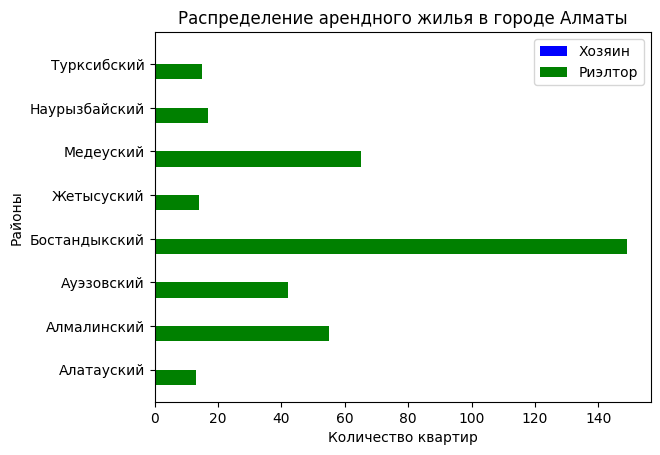

In [20]:
n_groups = 8

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35

rects1 = plt.barh(index + bar_width, df4['owner'], bar_width,
color='b',
label='Хозяин')

rects2 = plt.barh(index, df4['specialist'], bar_width,
color='g',
label='Риэлтор')

plt.ylabel('Районы')
plt.xlabel('Количество квартир')
plt.title('Распределение арендного жилья в городе Алматы')
plt.yticks(index + bar_width/2, df4.index)
plt.legend()

In [21]:
df.head()

,price,owner,specialist,rooms,square,district,year
0,390000,0,1,2,87.0,Бостандыкский,2016
1,500000,0,1,2,68.6,Бостандыкский,2021
5,300000,0,1,2,62.0,Наурызбайский,2021
17,750000,0,1,3,110.0,Бостандыкский,2001
19,850000,0,1,3,140.0,Бостандыкский,2020


In [22]:
df5 = df.groupby(['rooms']).size().reset_index(name='count')
df5.sort_values(by=['count'], inplace=True)
df5.set_index('rooms', inplace=True)
df5

,count
rooms,
5,9
4,34
1,78
3,121
2,128


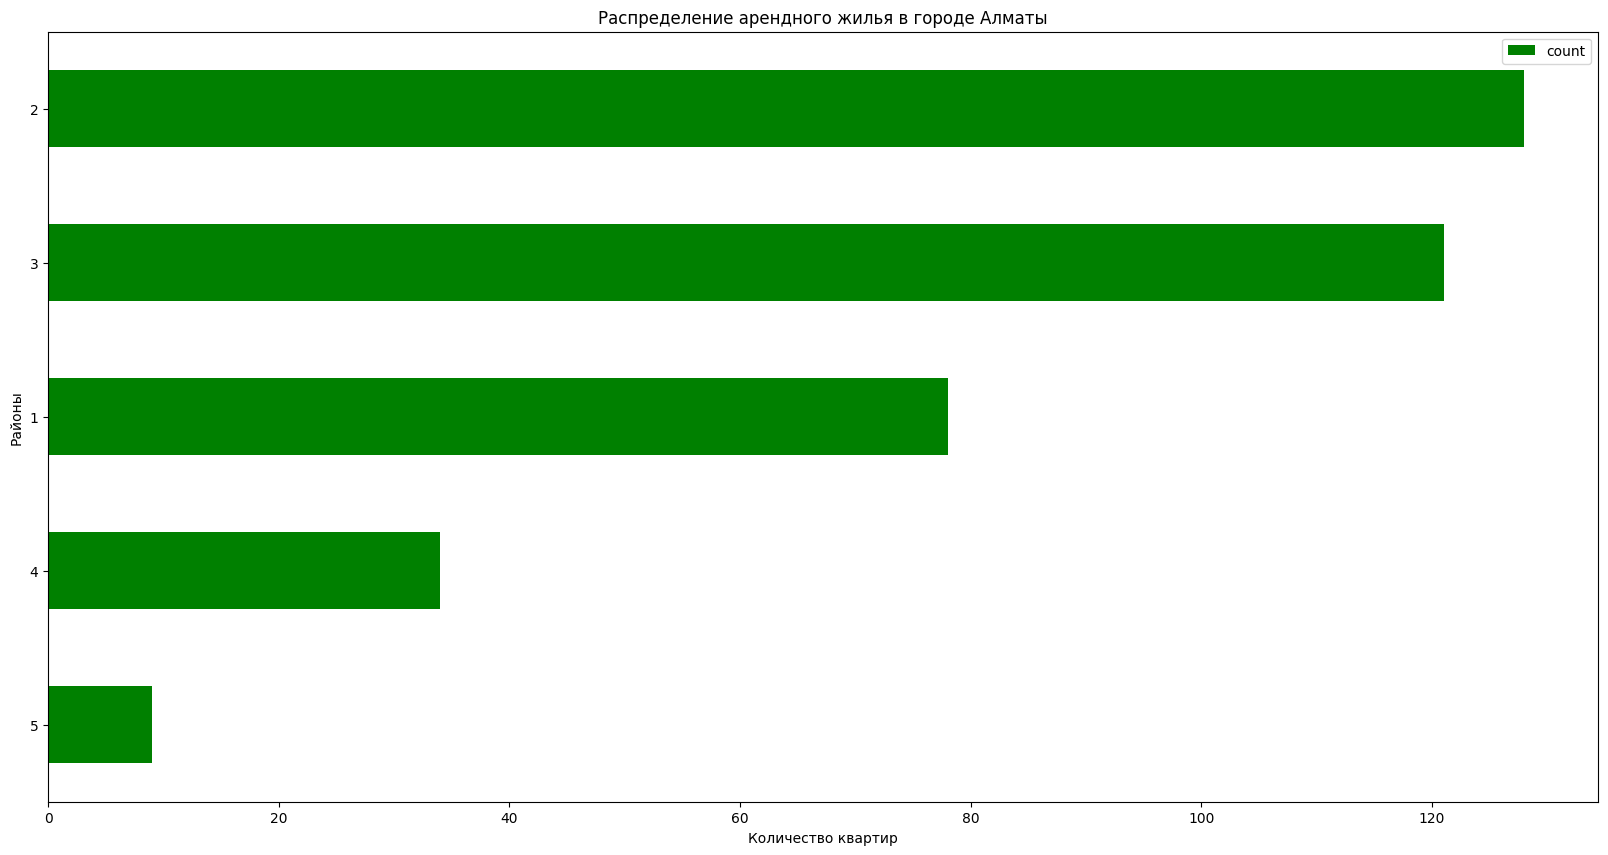

In [23]:
df5.plot(kind='barh', 
             stacked=False,
             figsize=(20, 10),
             color='g',
             label=df5['count']
             )

plt.title('Распределение арендного жилья в городе Алматы')
plt.xlabel('Количество квартир')
plt.ylabel('Районы')
plt.show()

In [24]:
df6 = df.groupby(['district','price']).size().reset_index(name='count')
df6.sort_values(by=['count'], inplace=True)
df6 = df6.pivot(index='price',columns='district',values='count')

In [25]:
df6

district,Алатауский,Алмалинский,Ауэзовский,Бостандыкский,Жетысуский,Медеуский,Наурызбайский,Турксибский
price,,,,,,,,
50000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
70000,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
100000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110000,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
120000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...
2500000,NaN,NaN,NaN,2.0,NaN,1.0,NaN,NaN
3000000,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN
3500000,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
